# Data Visualization & Preprocessing

In [1]:
import numpy as np

## Loading Data

In [2]:
X = [] # Features per class
y = [] # Labels
N = 5250 # Amount of data we want to use max: 5250

# Import the features
with open("traindata.txt", "r") as file:
    for line in file.readlines()[:N]:
        features = [float(i) for i in line.split(",")]
        X.append(features)

# Import the labels
with open("trainlabels.txt", "r") as file:
    for line in file.readlines()[:N]:
        label = float(line.rstrip())
        y.append(label)
    
# Convert data to numpy arrays
X = np.array(X)
y = np.array(y, dtype=np.int32)

## Data Preprocessing

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
def rotate_image(image, orientation):
    angle = 90 * orientation
    
    if angle == 0:
        return image
    elif angle == 90:
        return np.fliplr(np.transpose(image))  # Rotate 90 degrees clockwise
    elif angle == 180:
        return np.flipud(np.fliplr(image))  # Rotate 180 degrees
    elif angle == 270:
        return np.transpose(np.fliplr(image))  # Rotate 270 degrees clockwise

In [12]:
image_number = 14
x = X[image_number, :-1]
orientation = X[image_number, -1] # 4 orientations: 0, 1, 2, 3
label = y[image_number]
print(orientation, label)

print(x[0])

filtered_x = x[x >= 0] # Filter out negative values
filtered_x = np.minimum(filtered_x, 255.0) # cap values greater than 255 to 255
image = filtered_x.reshape([32, 32]) # reshape to an image
minmaxscaler = MinMaxScaler()
normalized_image = minmaxscaler.fit_transform(image) # Normalize Image

rotated_image = rotate_image(normalized_image, orientation)


1.0 12
64.14180755615234


## Visualize Image

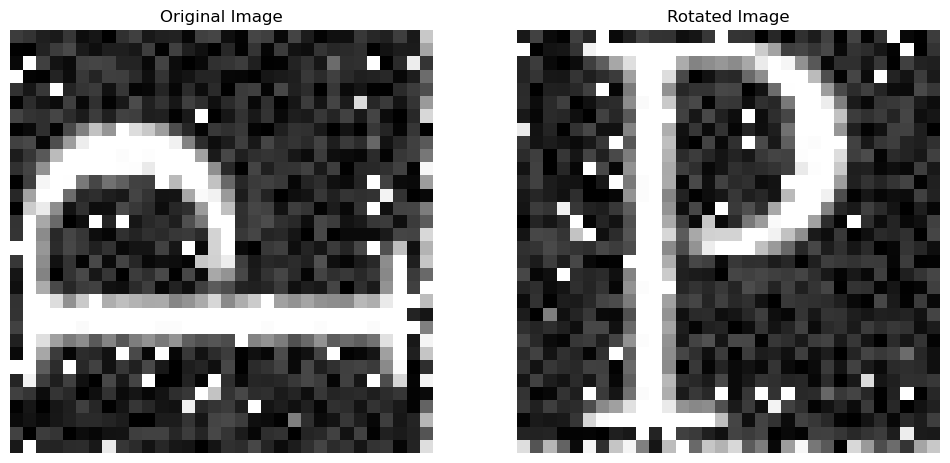

In [13]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(normalized_image, cmap="gray")
axes[0].set_title('Original Image')
axes[0].axis('off')  # Hide the axis

# Display the rotated image
axes[1].imshow(rotated_image, cmap="gray")
axes[1].set_title('Rotated Image')
axes[1].axis('off')  # Hide the axis

# Show the figure
plt.show()

In [14]:
def preprocess_data(X):
    x = X[:-1]
    orientation = X[-1] # 4 orientations: 0, 1, 2, 3

    filtered_x = x[x >= 0] # Filter out negative values
    filtered_x = np.minimum(filtered_x, 255.0) # cap values greater than 255 to 255
    image = filtered_x.reshape([32, 32]) # reshape to an image
    minmaxscaler = MinMaxScaler()
    normalized_image = minmaxscaler.fit_transform(image) # Normalize Image

    rotated_image = rotate_image(normalized_image, orientation)
    return rotated_image

def create_labels_data(X, y):
    labels_data = {i:[] for i in np.unique(y)}

    for index, label in enumerate(y):
        processed_X = preprocess_data(X[index])
        labels_data[label].append(processed_X)

    return labels_data

def plot_images(image, title):
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {title}")
    plt.show()


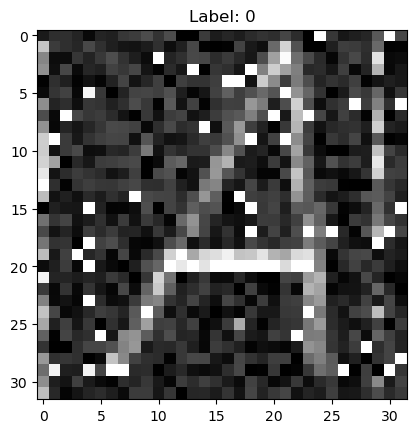

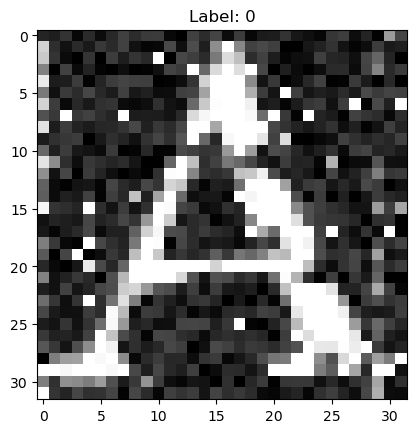

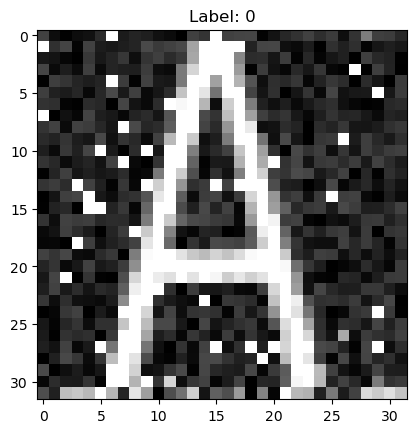

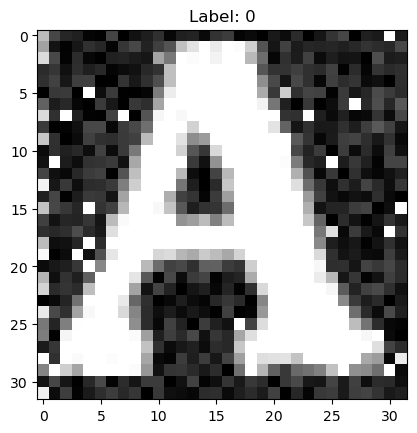

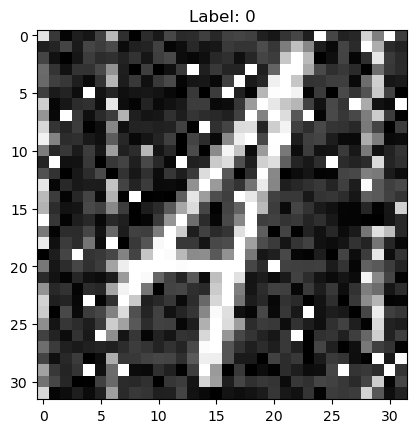

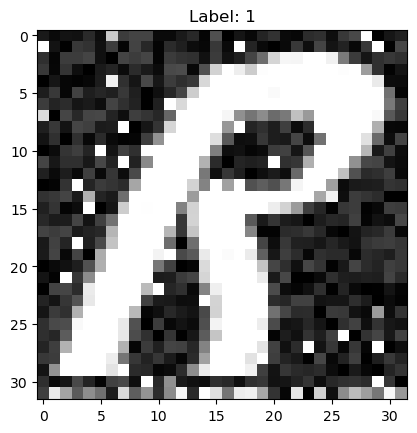

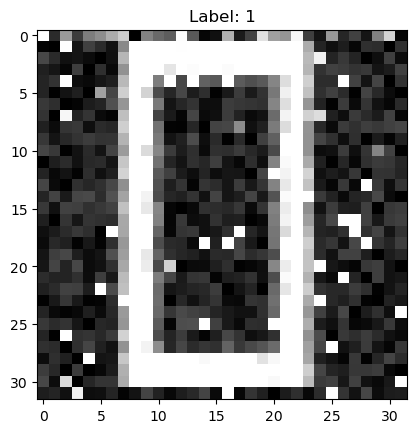

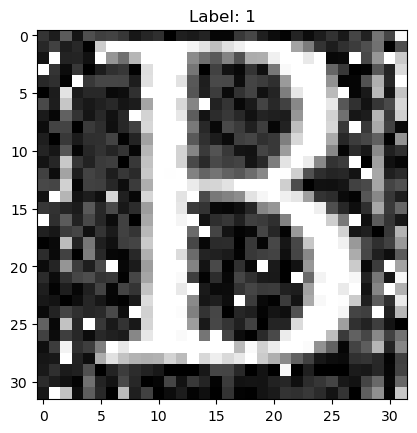

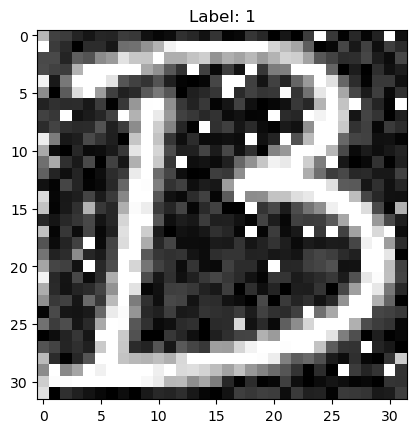

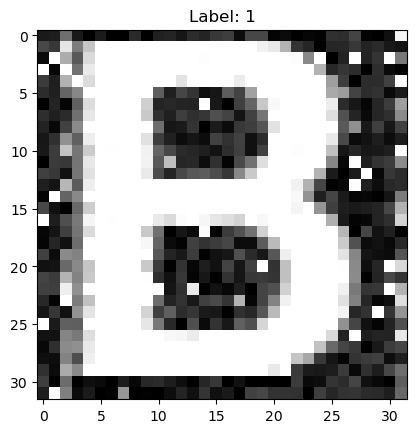

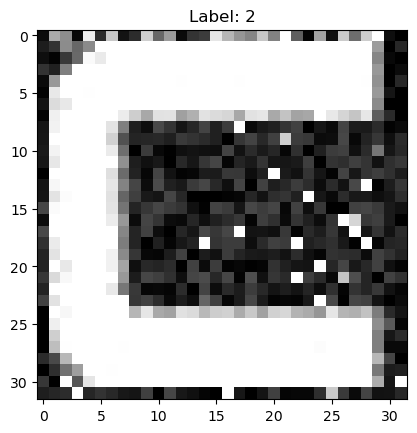

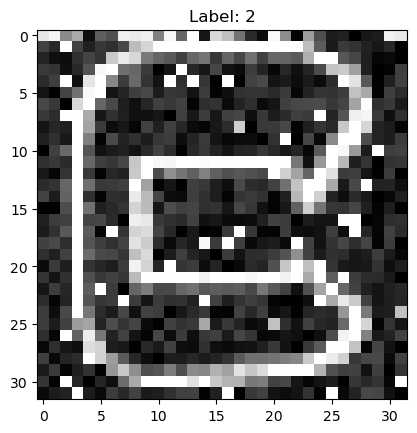

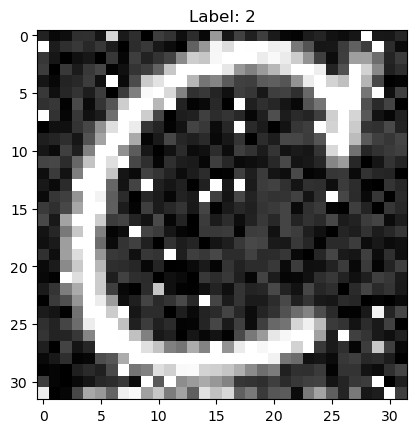

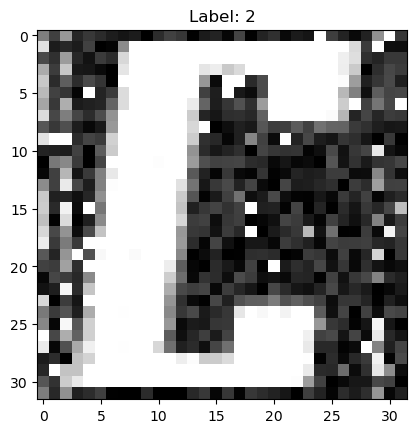

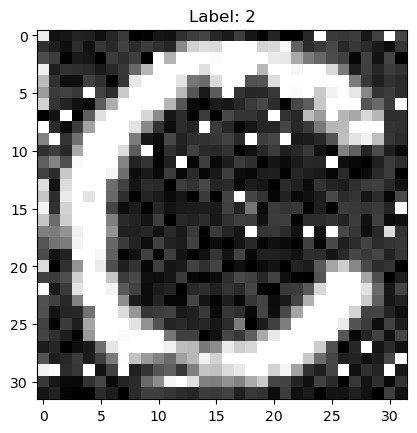

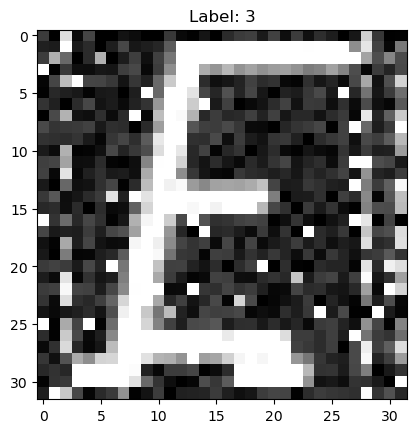

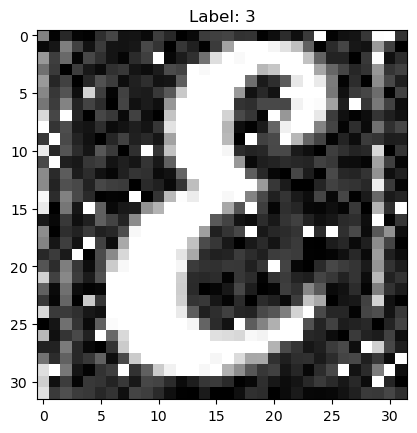

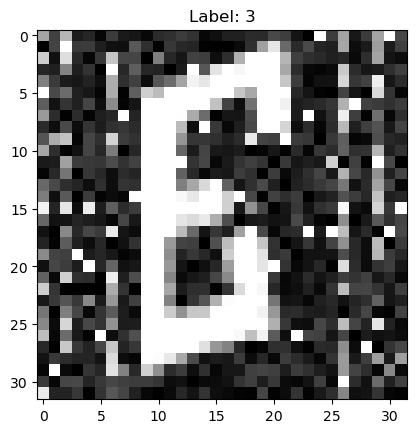

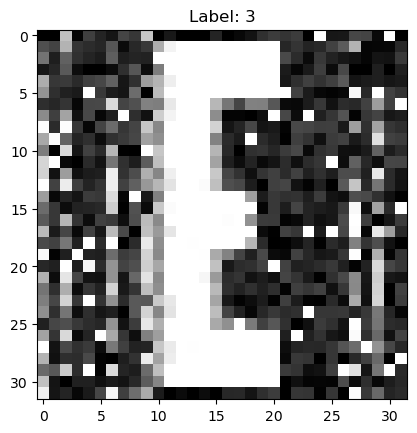

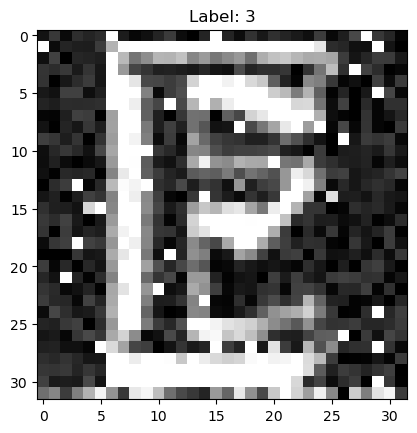

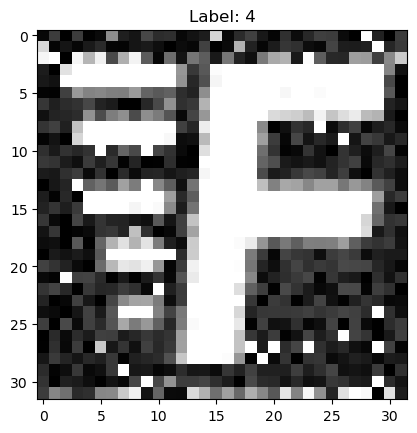

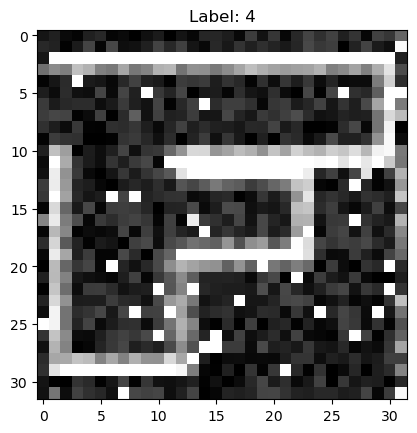

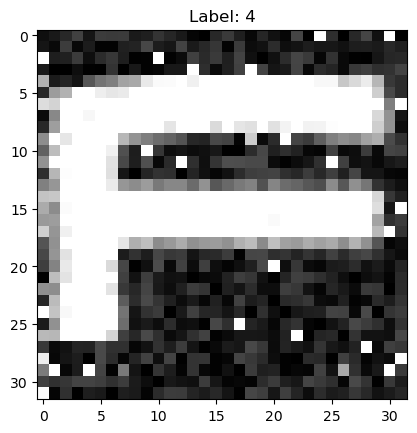

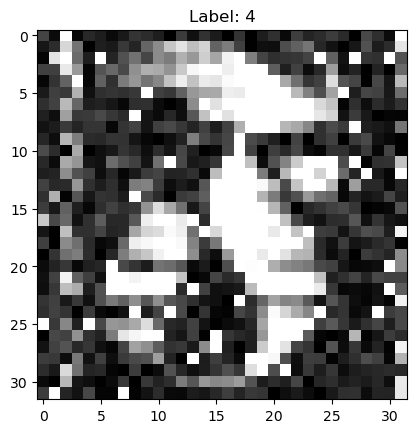

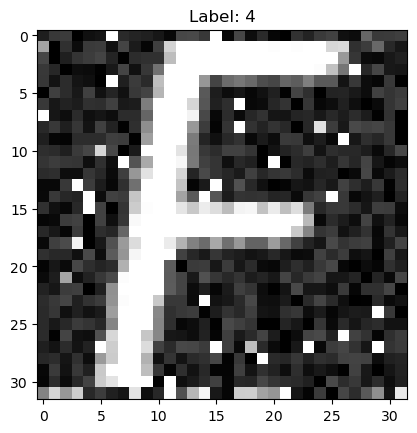

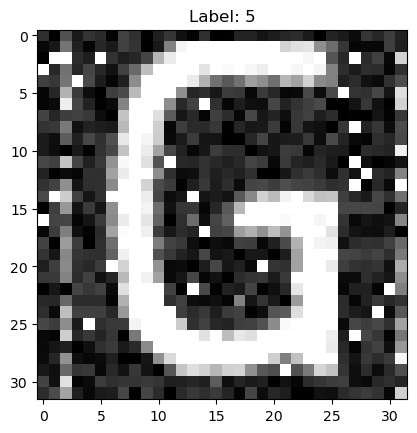

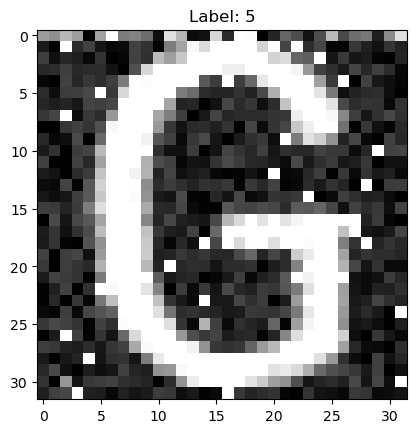

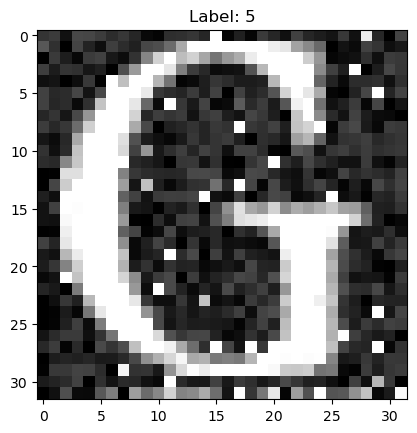

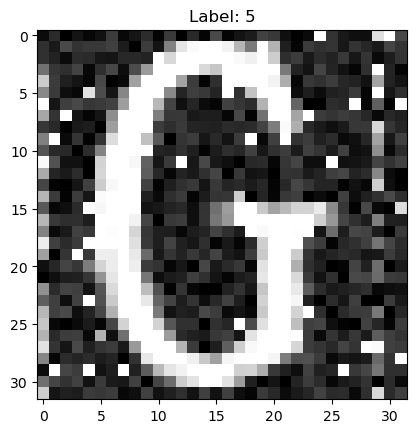

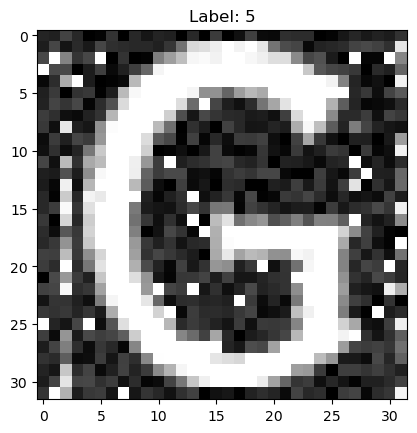

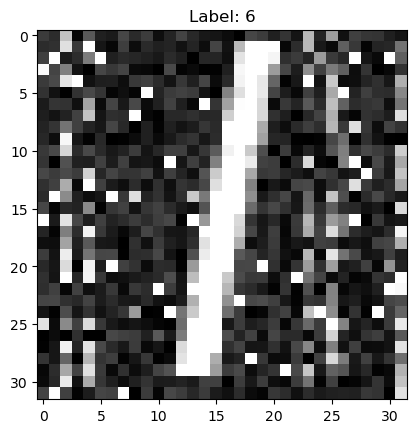

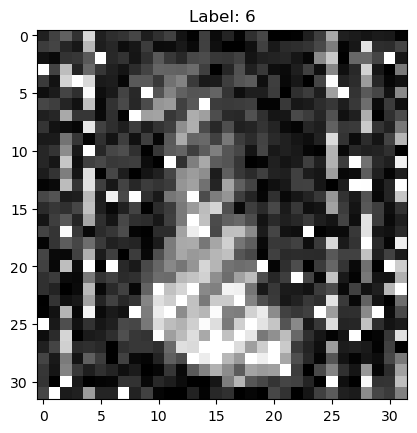

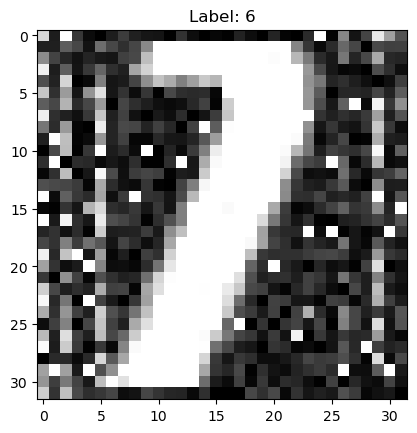

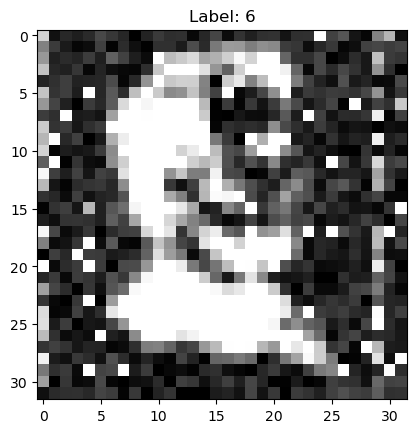

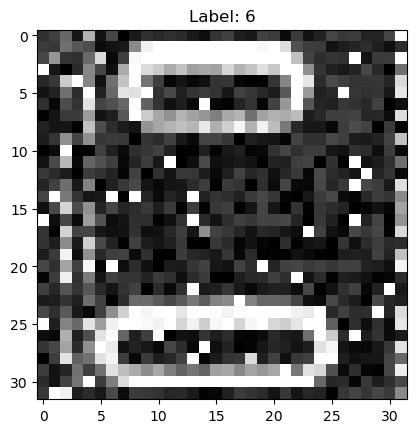

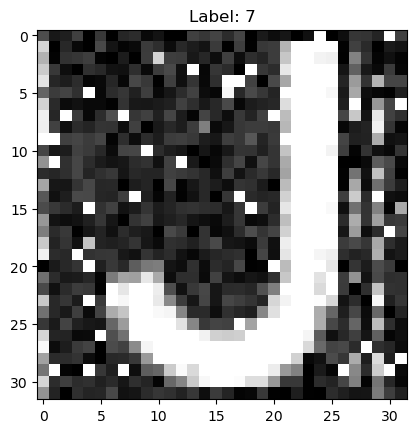

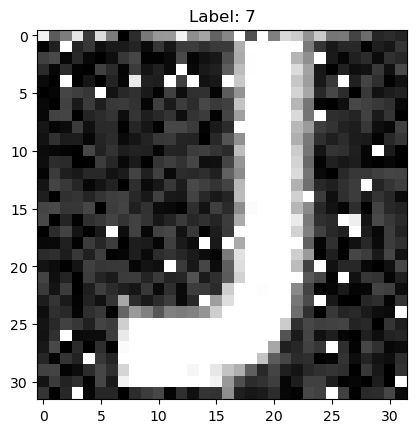

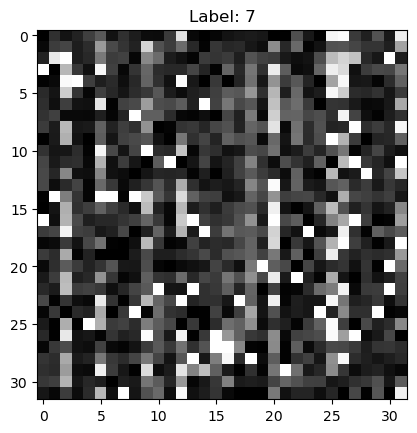

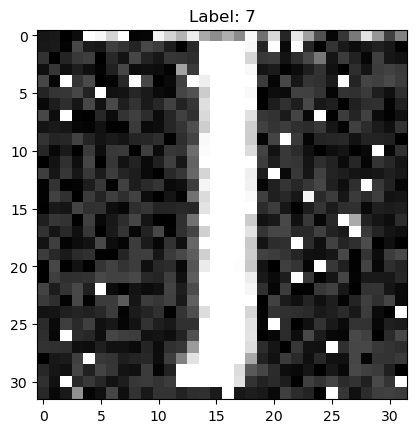

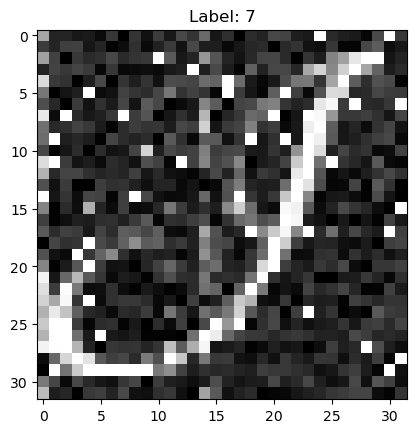

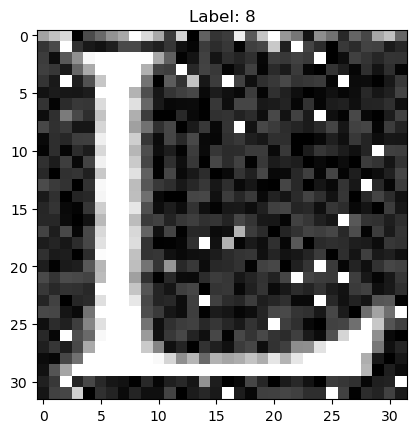

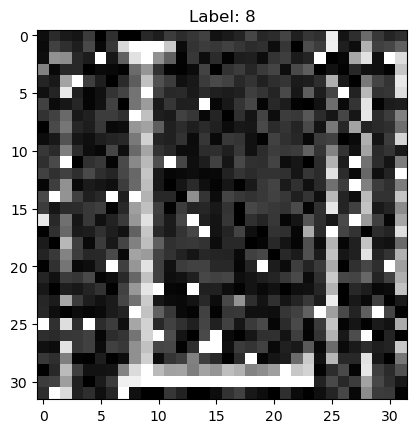

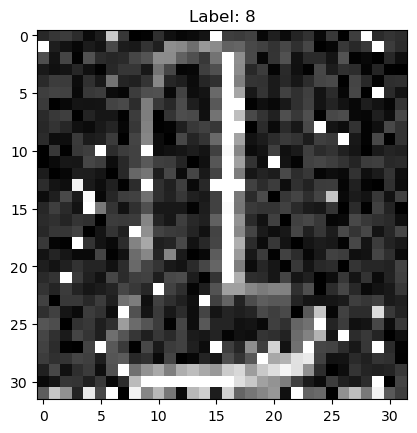

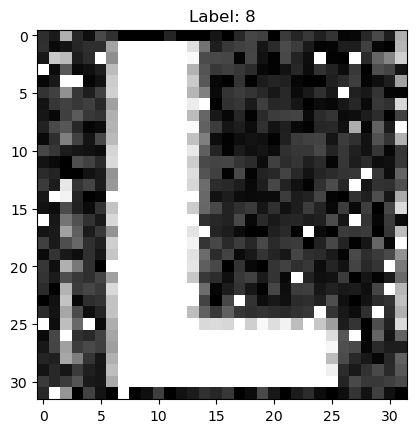

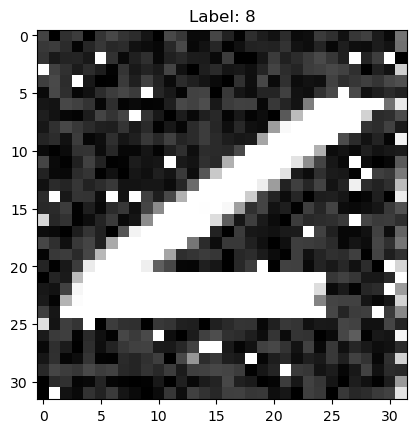

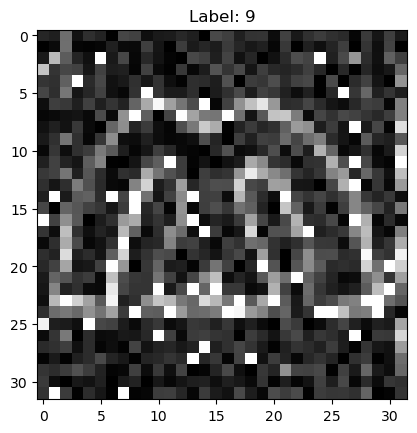

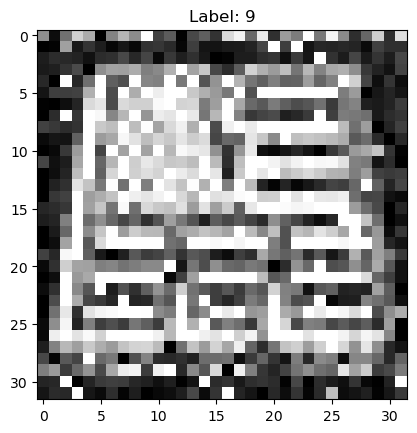

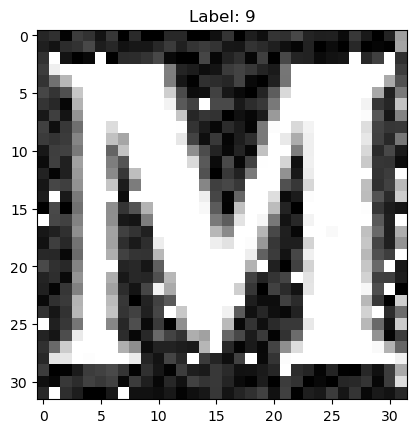

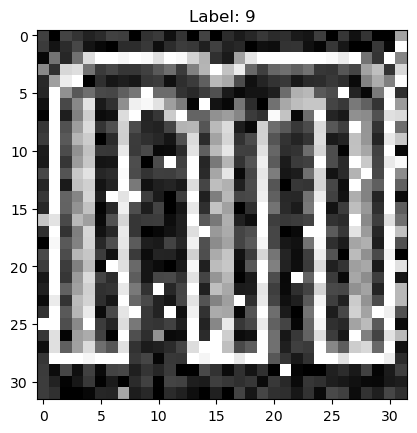

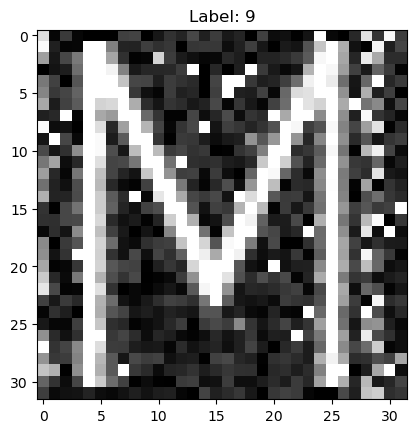

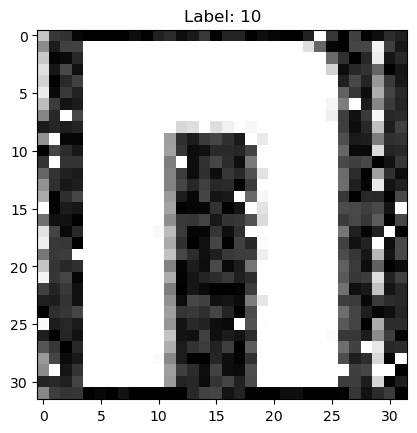

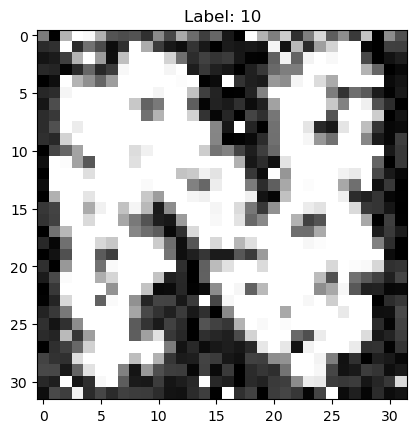

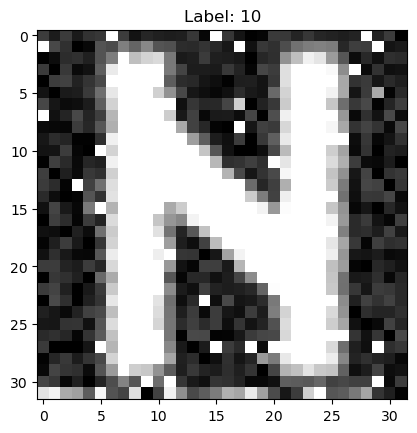

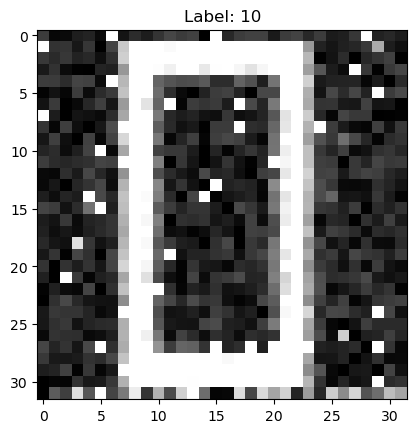

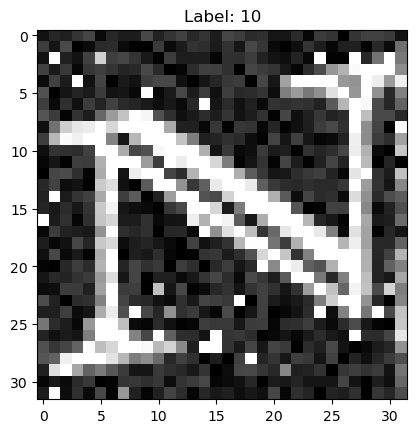

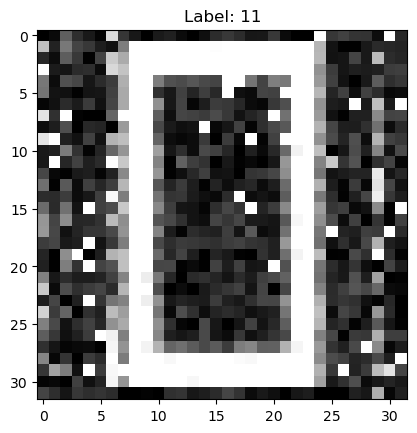

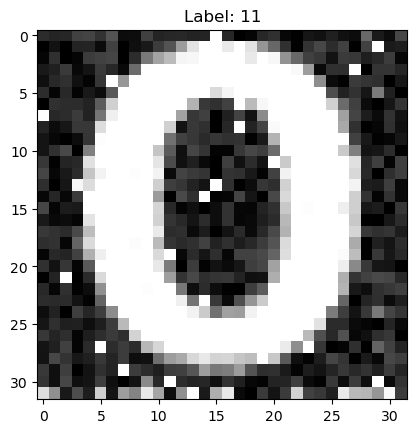

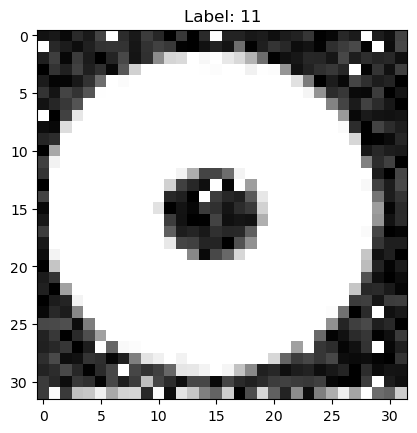

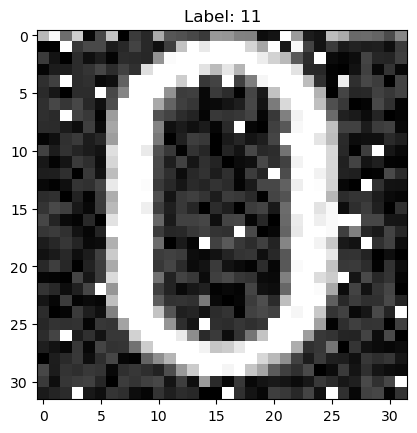

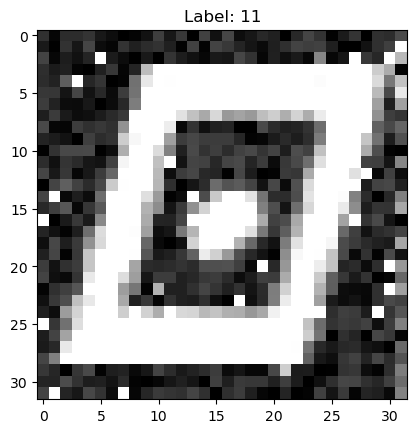

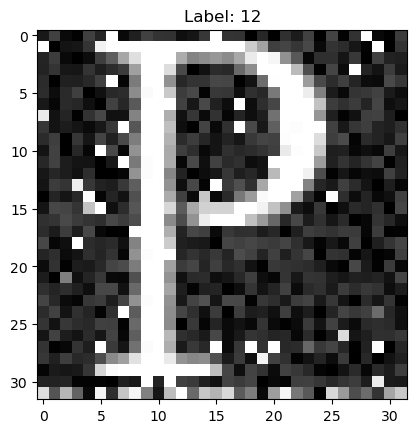

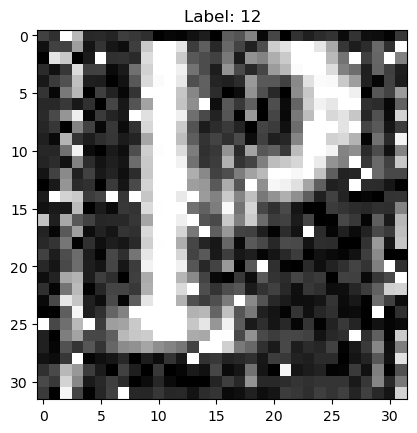

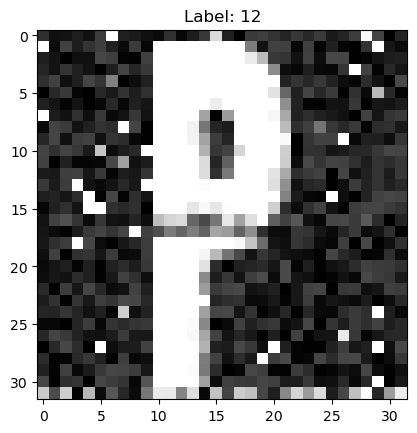

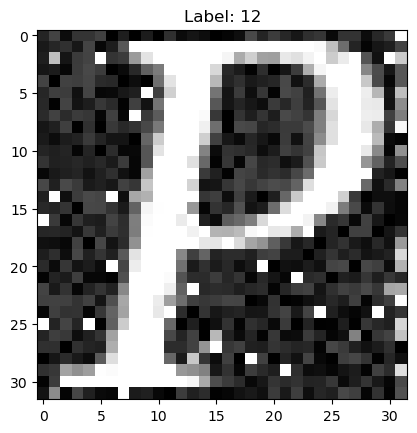

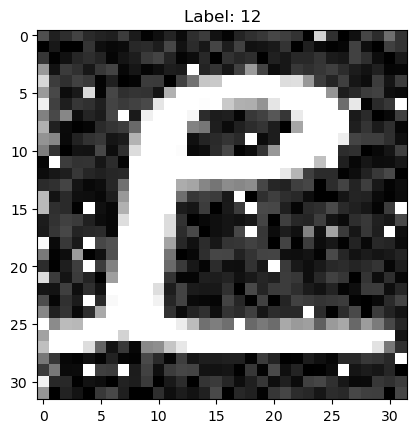

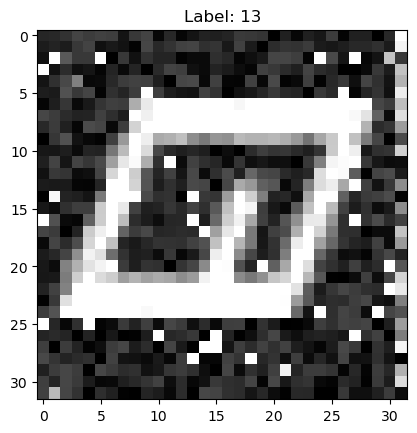

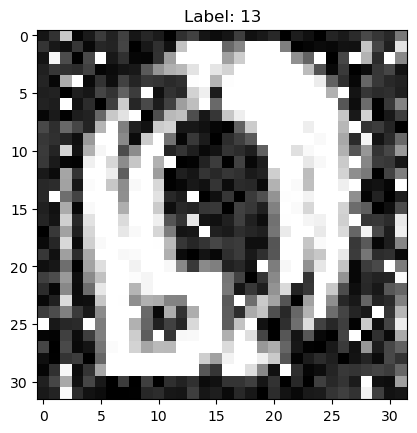

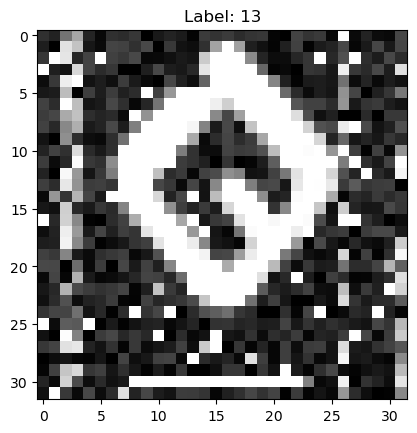

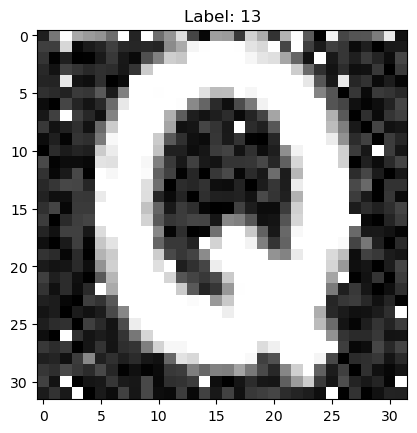

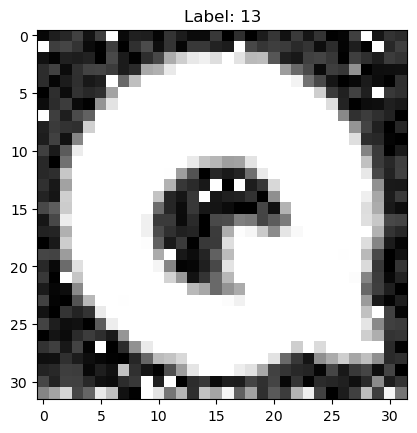

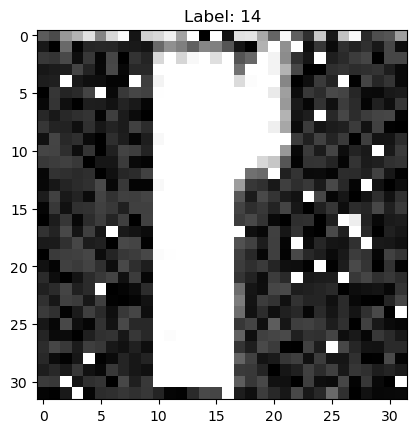

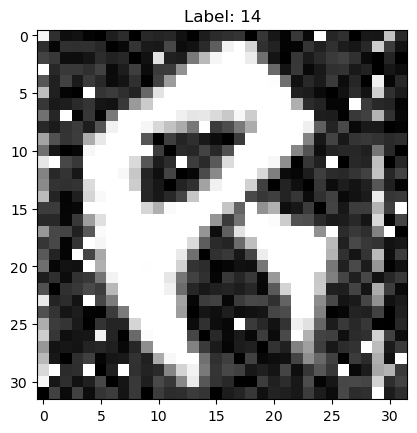

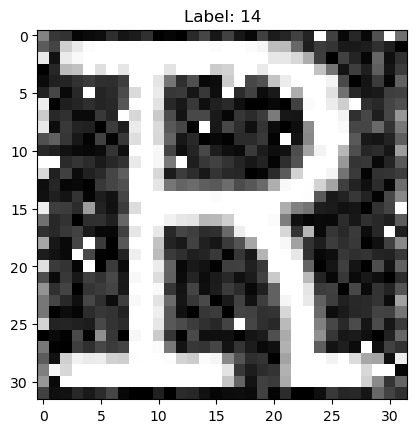

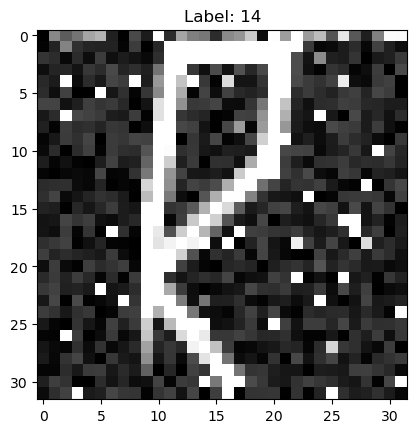

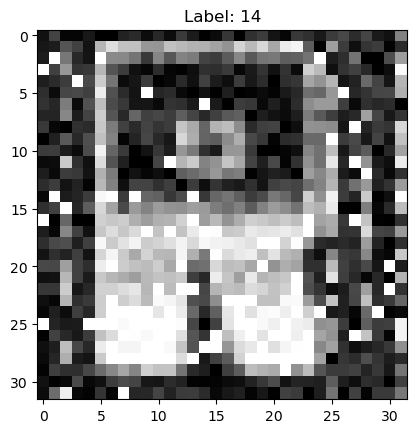

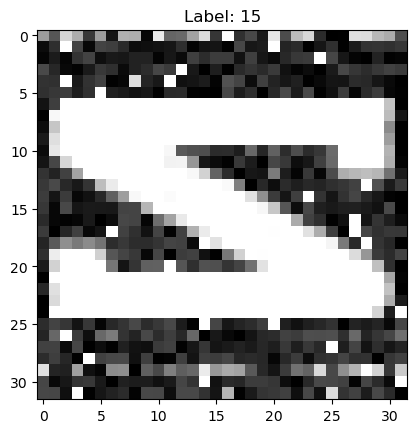

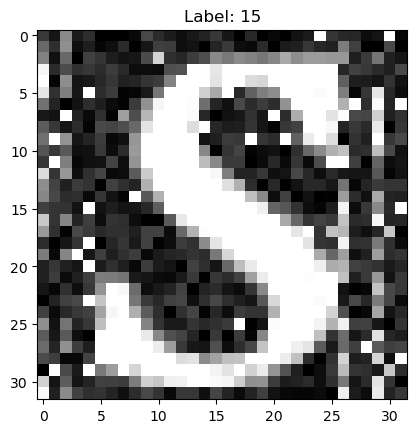

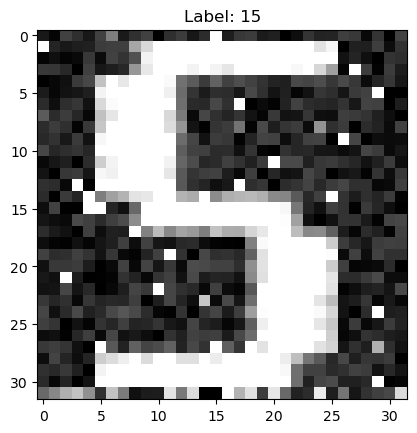

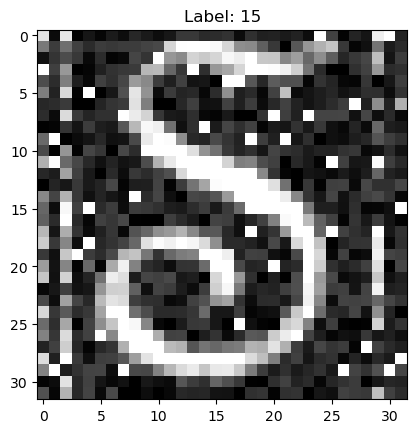

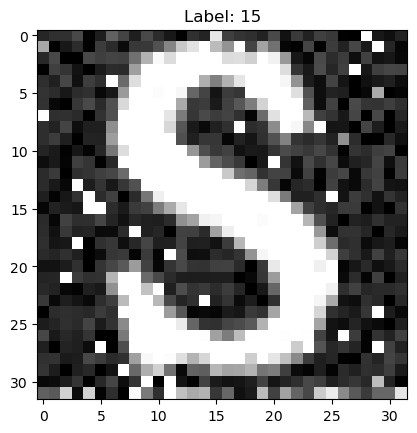

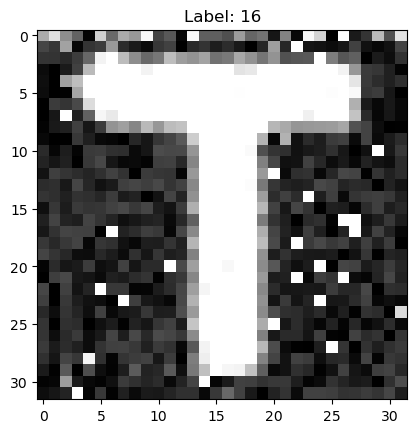

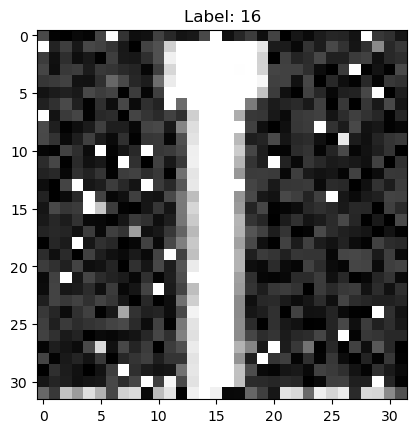

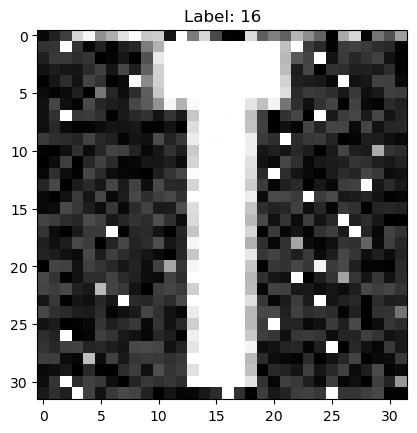

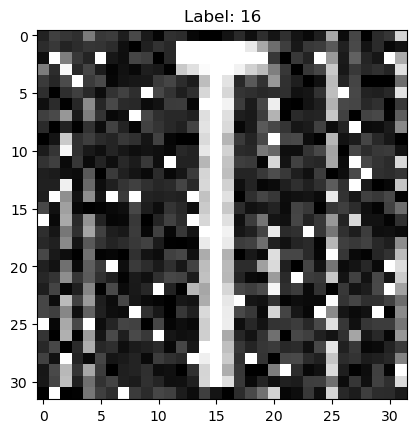

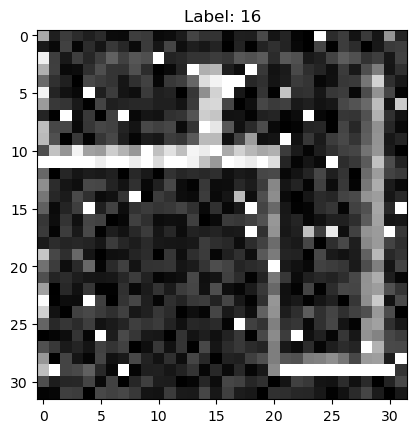

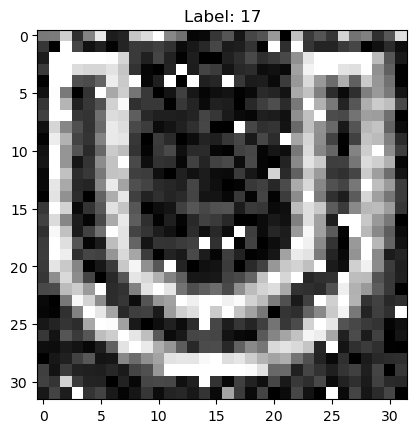

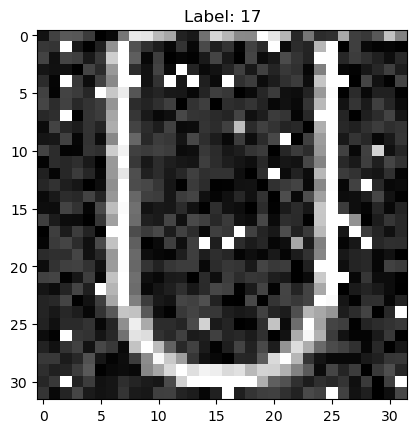

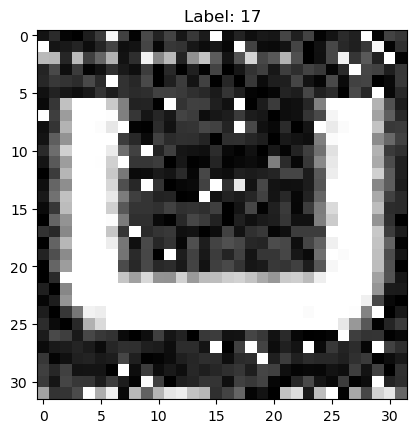

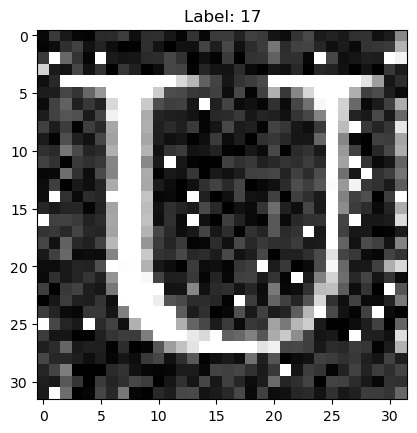

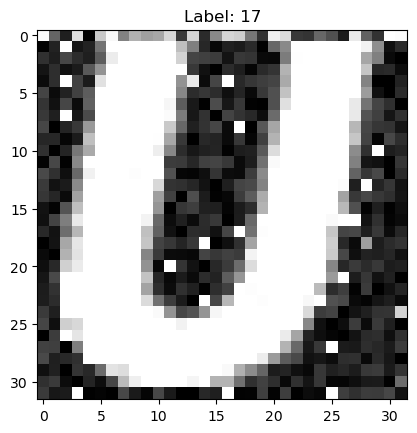

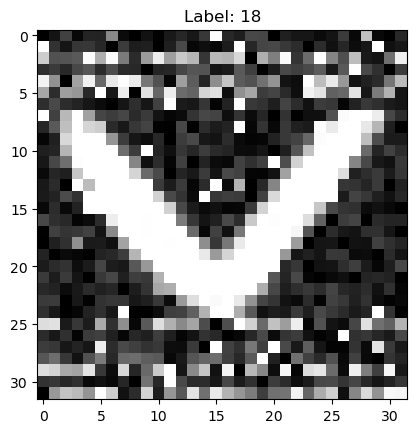

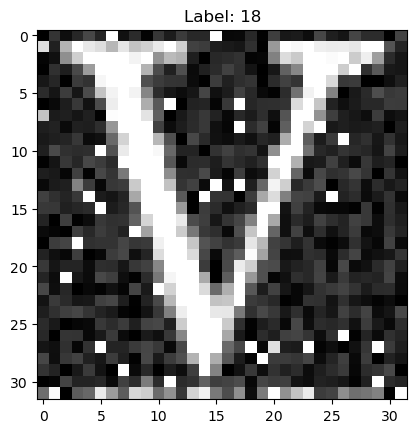

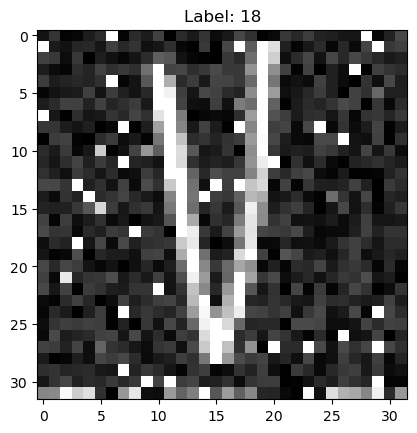

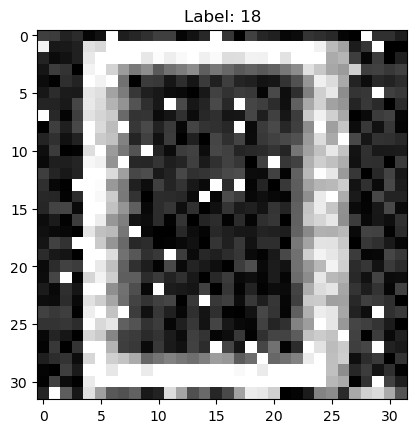

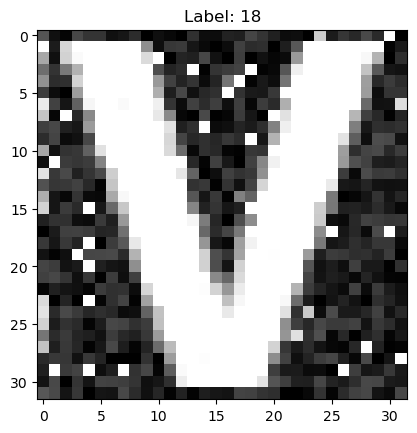

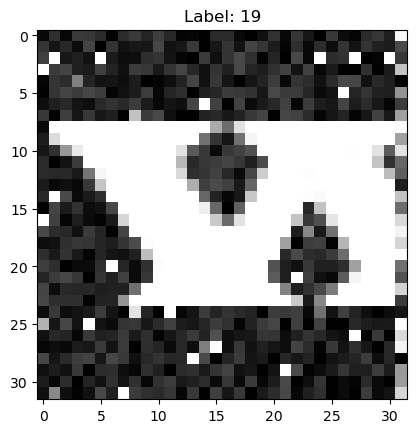

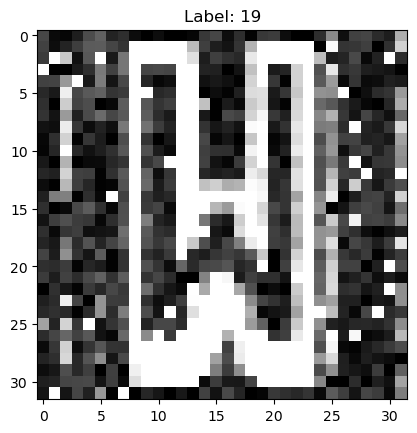

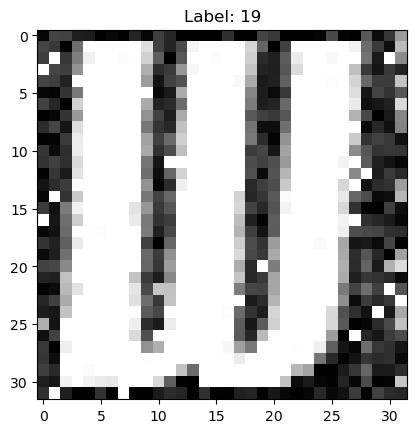

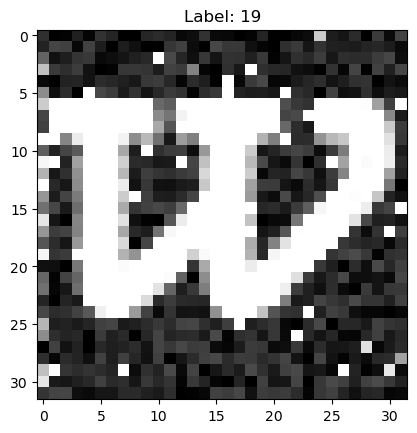

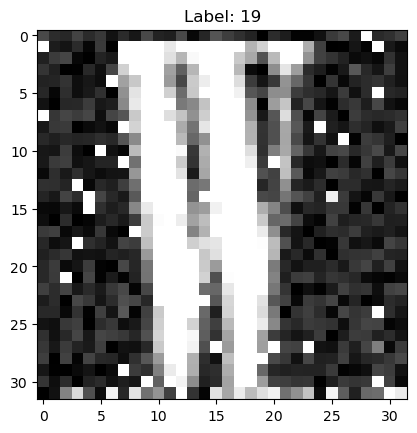

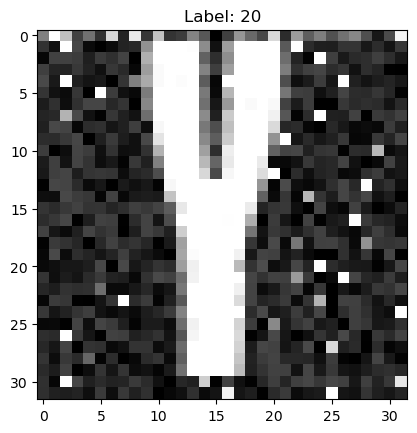

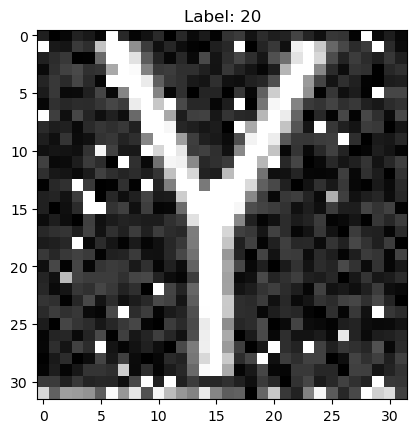

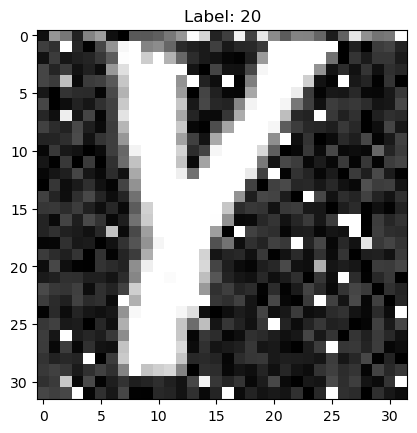

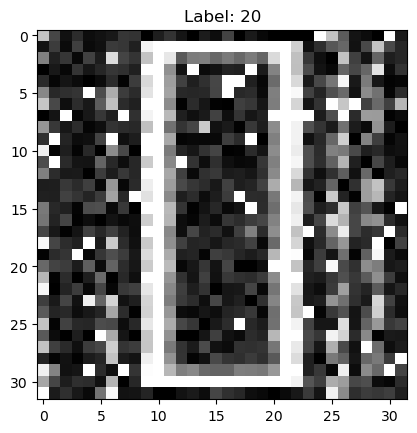

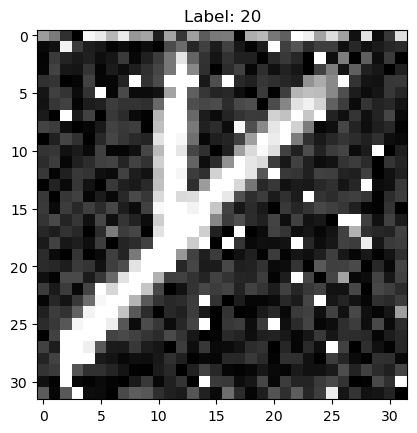

In [15]:
labels_data = create_labels_data(X, y)

for label, images in labels_data.items():
    for image in images[:5]:
        plot_images(image, label)

In [ ]:
from imblearn.over_sampling import SMOTE

new_X = labels_data[0]
new_y = [0] * labels_data[0].shape[0]

for i in range(1, len(labels_data)):
    new_X = np.vstack([new_X, labels_data[i]])
    new_y += [i] * labels_data[i].shape[0]

new_y = np.array(new_y)
print(new_X.shape)
print(new_y.shape)

smote = SMOTE()

new_X_smote, new_y_smote = smote.fit_resample(new_X, new_y)

print(new_X_smote.shape)
print(new_y_smote.shape)

labels_data_smote = create_labels_data(new_X_smote, new_y)
for label in range(21):
    labels_data_smote[label] = np.array(labels_data_smote[label])

In [ ]:
np.save("./augmented_traindata", new_X_smote)
np.save("./augmented_trainlabels", new_y_smote)